# MNIST handwritten digits classification with MLPs

In this notebook, we'll train a multi-layer perceptron model to classify MNIST digits using **PyTorch**. 

First, the needed imports. 

In [29]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.12.0+cu113  Device: cuda


## Data

Next we'll load the MNIST data.  First time we may have to download the data, which can take a while.

Note that we are here using the MNIST test data for *validation*, instead of for testing the final model.

In [30]:
batch_size = 32

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

The train and test data are provided via data loaders that provide iterators over the datasets. The first element of training data (`X_train`) is a 4th-order tensor of size (`batch_size`, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. `y_train` is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

In [31]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Here are the first 10 training digits:

<Figure size 720x72 with 0 Axes>

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 9')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 8')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 5')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 1')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 3')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 2')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 7')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 5')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 0')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Class: 8')

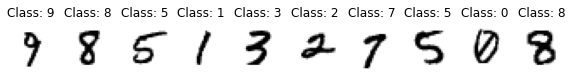

In [32]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
    plt.title('Class: '+str(y_train[i].item()))

## MLP network definition

Let's define the network as a Python class.  We have to write the `__init__()` and `forward()` methods, and PyTorch will automatically generate a `backward()` method for computing the gradients for the backward pass.

Finally, we define an optimizer to update the model parameters based on the computed gradients.  We select *stochastic gradient descent (with momentum)* as the optimization algorithm, and set *learning rate* to 0.01.  Note that there are [several different options](http://pytorch.org/docs/optim.html#algorithms) for the optimizer in PyTorch that we could use instead of *SGD*.

In [87]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # weight: [28*28, 50]   bias: [50, ]
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 80)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(80, 10)
        
#         self.relu1 = nn.ReLU() 

    def forward(self, x):
        x = x.view(-1, 28*28)   # [32, 28*28]
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)   # [32, 10]
        return F.log_softmax(self.fc3(x), dim=1)

model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=80, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


In [49]:
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # weight: [28*28, 50]   bias: [50, ]
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 80)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(80, 60)
        self.fc3_drop = nn.Dropout(0.2)
        self.fc4 = nn.Linear(60, 40)
        self.fc4_drop = nn.Dropout(0.2)
        self.fc5 = nn.Linear(40, 10)
        
#         self.relu1 = nn.ReLU() 

    def forward(self, x):
        x = x.view(-1, 28*28)   # [32, 28*28]
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        x = F.relu(self.fc4(x))
        x = self.fc4_drop(x)
        return F.log_softmax(self.fc5(x), dim=1)
    
model = Net5().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net5(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=80, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=80, out_features=60, bias=True)
  (fc3_drop): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=60, out_features=40, bias=True)
  (fc4_drop): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=40, out_features=10, bias=True)
)


In [52]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # weight: [28*28, 50]   bias: [50, ]
        self.fc1_drop = nn.Dropout(0.2)
        
#         self.relu1 = nn.ReLU() 

    def forward(self, x):
        x = x.view(-1, 28*28)   # [32, 28*28]
        return F.log_softmax(self.fc1(x), dim=1)
    
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net1(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
)


In [63]:
class Net_narrow(nn.Module):
    def __init__(self):
        super(Net_narrow, self).__init__()
        self.fc1 = nn.Linear(28*28, 80)  # weight: [28*28, 50]   bias: [50, ]
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(80, 40)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(40, 10)
        
#         self.relu1 = nn.ReLU() 

    def forward(self, x):
        x = x.view(-1, 28*28)   # [32, 28*28]
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)   # [32, 10]
        return F.log_softmax(self.fc3(x), dim=1)

model = Net_narrow().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net_narrow(
  (fc1): Linear(in_features=784, out_features=80, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)


In [66]:
class Net_wide(nn.Module):
    def __init__(self):
        super(Net_wide, self).__init__()
        self.fc1 = nn.Linear(28*28, 200)  # weight: [28*28, 50]   bias: [50, ]
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(200, 100)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(100, 10)
        
#         self.relu1 = nn.ReLU() 

    def forward(self, x):
        x = x.view(-1, 28*28)   # [32, 28*28]
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)   # [32, 10]
        return F.log_softmax(self.fc3(x), dim=1)

model = Net_wide().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net_wide(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


## Learning

Let's now define functions to `train()` and `validate()` the model. 

In [34]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()  
        
        # Update weights
        optimizer.step()    #  w - alpha * dL / dw
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [35]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))


Now we are ready to train our model using the `train()` function.  An *epoch* means one pass through the whole training data. After each epoch, we evaluate the model using `validate()`. 

In [76]:
%%time
epochs = 20

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319169
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.277546
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.278969
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.236584
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.252280
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.218891
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.209684
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.162268
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.078982
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.056607

Validation set: Average loss: 2.0383, Accuracy: 4184/10000 (42%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.094591
Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.052733
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.895043
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.770961
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.795968
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.625683
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.642763
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.402403
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.49

Let's now visualize how the training progressed. 

* *Loss* is a function of the difference of the network output and the target values.  We are minimizing the loss function during training so it should decrease over time.
* *Accuracy* is the classification accuracy for the test data.

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'validation loss')

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'validation accuracy')

tensor(97.8100)


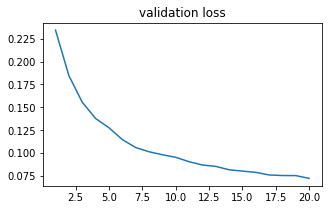

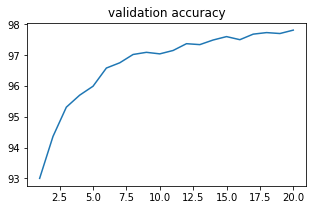

In [38]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

print(accv[-1])

## Model tuning

Modify the MLP model.  Try to improve the classification accuracy, or experiment with the effects of different parameters.  If you are interested in the state-of-the-art performance on permutation invariant MNIST, see e.g. this [recent paper](https://arxiv.org/abs/1507.02672) by Aalto University / The Curious AI Company researchers.

You can also consult the PyTorch documentation at http://pytorch.org/.

In [55]:
accv1 = accv.copy()
lossv1 = lossv.copy()

In [45]:
accv3 = accv.copy()
loss3 = lossv.copy()

In [51]:
accv5 = accv.copy()
lossv5 = lossv.copy()

In [65]:
acc_n = accv.copy()
loss_n = lossv.copy()

In [68]:
acc_w = accv.copy()
loss_w = lossv.copy()

In [74]:
acc_01 = accv.copy()
loss_01 = lossv.copy()

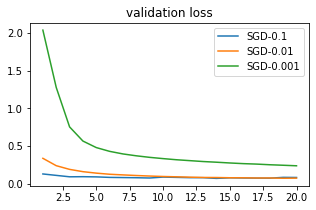

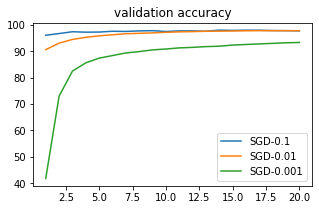

In [77]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), loss_01)
plt.plot(np.arange(1,epochs+1), loss3)
plt.plot(np.arange(1,epochs+1), lossv)
plt.legend(['SGD-0.1','SGD-0.01','SGD-0.001'])
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), acc_01)
plt.plot(np.arange(1,epochs+1), accv3)
plt.plot(np.arange(1,epochs+1), accv)
plt.legend(['SGD-0.1','SGD-0.01','SGD-0.001'])
plt.title('validation accuracy');


## VIP

In [89]:
import torch.nn as nn

class WeightedMLP(nn.Module):
    def __init__(self, dim, qkv_bias=False, dropout=0.7):
        super().__init__()
        self.mlp_c = nn.Linear(dim, dim, bias=qkv_bias)
        self.mlp_h = nn.Linear(dim, dim, bias=qkv_bias)
        self.mlp_w = nn.Linear(dim, dim, bias=qkv_bias)
        self.reweight = nn.Sequential(nn.Linear(dim, dim//4), nn.ReLU(), nn.Linear(dim//4, dim*3))
        self.out_proj = nn.Linear(dim, dim)
        self.drop = nn.Dropout(dropout)
    
    def forward(self, x):
        '''
        Input:
        x :[B, H, W, C]
        '''
        B, H, W, C = x.shape
        num_heads = H
        head_dim = C // H
        # col-wise
        h = x.reshape(B, H, W, num_heads, head_dim).permute(0, 3, 2, 1, 4).reshape(B, num_heads, W, H*head_dim)
        h = self.mlp_h(h).reshape(B, num_heads, W, H, head_dim).permute(0, 3, 2, 1, 4).reshape(B, H, W, C)
        # row-wise
        w = x.reshape(B, H, W, num_heads, head_dim).permute(0, 1, 3, 2, 4).reshape(B, H, num_heads, W*head_dim)
        w = self.mlp_w(w).reshape(B, H, num_heads, W, head_dim).permute(0, 1, 3, 2, 4).reshape(B, H, W, C)
        # channel-wise
        c = self.mlp_c(x)
        
        a = (h + w + c).permute(0, 3, 1, 2).flatten(2).mean(2)  #keep channel, mean pooling across the whole image, [B, C]
        a = self.reweight(a).reshape(B, C, 3).permute(2, 0, 1).softmax(dim=0).unsqueeze(2).unsqueeze(2) #[3, B, 1, 1, C]

        x = h * a[0] + w * a[1] + c * a[2]

        x = self.out_proj(x)
        x = self.drop(x)
        return x
        
class PermutatorBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.vip_block = WeightedMLP(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(nn.Linear(dim, dim*4), nn.ReLU(), nn.Linear(dim*4, dim))
         
    def forward(self, x):
        x = self.vip_block(self.norm1(x)) + x
        x = self.mlp(self.norm2(x)) + x
        return x
    
class Vip(nn.Module):
    def __init__(self, input_size=32, embed_dim=384, patch_size=2, num_layers=6, num_classes=100):
        super().__init__()
        self.embedding = nn.Conv2d(in_channels=1, 
                                   out_channels=embed_dim, 
                                   kernel_size=patch_size, 
                                   stride=patch_size, 
                                   )
        encoder_list = []
        for i in range(num_layers):
            encoder_list.append(PermutatorBlock(embed_dim))
        self.encoder = nn.ModuleList(encoder_list)
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        '''
        Input:
        x: [B, C, H, W]
        '''
        x = self.embedding(x)
        B, C, H, W = x.shape
        x = x.permute(0, 2, 3, 1)   #[B, H, W, C]
        for module in self.encoder:
            x = module(x)
        x = self.norm(x)
        x = x.reshape((B, H*W, C)).mean(1)  #[B, C]
        x = self.head(x)
        return x

model = Vip(input_size=28, embed_dim=336, num_classes=10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Vip(
  (embedding): Conv2d(1, 336, kernel_size=(2, 2), stride=(2, 2))
  (encoder): ModuleList(
    (0): PermutatorBlock(
      (norm1): LayerNorm((336,), eps=1e-05, elementwise_affine=True)
      (vip_block): WeightedMLP(
        (mlp_c): Linear(in_features=336, out_features=336, bias=False)
        (mlp_h): Linear(in_features=336, out_features=336, bias=False)
        (mlp_w): Linear(in_features=336, out_features=336, bias=False)
        (reweight): Sequential(
          (0): Linear(in_features=336, out_features=84, bias=True)
          (1): ReLU()
          (2): Linear(in_features=84, out_features=1008, bias=True)
        )
        (out_proj): Linear(in_features=336, out_features=336, bias=True)
        (drop): Dropout(p=0.7, inplace=False)
      )
      (norm2): LayerNorm((336,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=336, out_features=1344, bias=True)
        (1): ReLU()
        (2): Linear(in_features=1344, out_features=336, bi

In [94]:

%%time
epochs = 10

for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.006760
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.016397
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.008482
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.049307
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.085652
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.051827
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.055049
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.020942
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.033155
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.029483

Validation set: Average loss: 0.1029, Accuracy: 9676/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.039842
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.058726
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.013027
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.034108
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.058880
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.019766
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.030645
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.107236
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.05

In [96]:
acc_vip = accv.copy()
loss_vip = lossv.copy()
print(loss3)
print(lossv)

[0.33583419733701614, 0.23799605322436404, 0.18895567089137724, 0.15856444671416817, 0.1390421709686238, 0.12416921111758049, 0.11557241283340779, 0.10744171066580864, 0.10046947492508236, 0.094442486050747, 0.09017869695937766, 0.0853716704961245, 0.08157248235020872, 0.08066946538486934, 0.07769856755627311, 0.07705489826308133, 0.07434453265468562, 0.07473824344571314, 0.07109174821166431, 0.07253118674758972]
[0.7007762387442512, 0.33947975540789554, 0.2759865917884313, 0.25410475197155924, 0.17880443998645193, 0.17788467638212413, 0.17447383611198194, 0.13290040145744197, 0.11593796653426089, 0.1026591778964923, 0.10285863927796114, 0.08120621327934162, 0.112451051372273, 0.07302626019672709, 0.08026573570981137, 0.08091520716733011, 0.07167387523404962, 0.06943064232770808, 0.08084974786351858, 0.07275625930854697]


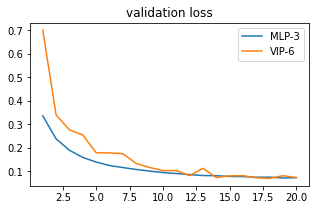

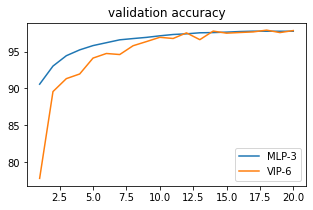

In [98]:
plt.figure(figsize=(5,3))
epochs=20
plt.plot(np.arange(1,epochs+1), loss3)
plt.plot(np.arange(1,epochs+1), lossv)
plt.legend(['MLP-3','VIP-6'])
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv3)
plt.plot(np.arange(1,epochs+1), accv)
plt.legend(['MLP-3','VIP-6'])
plt.title('validation accuracy');